<a href="https://colab.research.google.com/github/BrandyTee/My-ML-Projects/blob/main/Real_Madrid_vs_Marseille_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

In [ ]:
#Load our Model
leagues = {"F1":"Ligue1", "SP1":"LaLiga"}

seasons = ["2526", "2425", "2324"]

for season in seasons:
    for code, league in leagues.items():
        url = f"https://www.football-data.co.uk/mmz4281/{season}/{code}.csv"
        df = pd.read_csv(url)
        df.to_csv(f"{league}_{season}.csv", index=False)
        print(f"Downloaded {league} {season}")

Downloaded Ligue1 2526
Downloaded LaLiga 2526
Downloaded Ligue1 2425
Downloaded LaLiga 2425
Downloaded Ligue1 2324
Downloaded LaLiga 2324


In [ ]:
sp26 = pd.read_csv("/content/LaLiga_2526.csv")
sp26.head(2)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BFECAHH,BFECAHA
0,SP1,15/08/2025,18:00,Girona,Vallecano,1,3,A,0,3,...,2.1,1.78,1.97,1.95,2.10,1.80,1.95,1.75,2.11,1.89
1,SP1,15/08/2025,20:30,Villarreal,Oviedo,2,0,H,2,0,...,1.9,1.95,1.93,2.00,1.94,1.96,1.82,1.87,1.96,2.02


In [ ]:
f26 = pd.read_csv("/content/Ligue1_2526.csv")
f26.head(2)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BFECAHH,BFECAHA
0,F1,15/08/2025,19:45,Rennes,Marseille,1,0,H,0,0,...,1.95,1.90,1.94,1.98,1.95,1.97,1.86,1.89,1.97,2.02
1,F1,16/08/2025,16:00,Lens,Lyon,0,1,A,0,1,...,1.80,2.05,1.76,2.18,1.82,2.10,1.77,2.02,1.86,2.15


In [ ]:
f25 = pd.read_csv("/content/Ligue1_2425.csv")
f24 = pd.read_csv("/content/Ligue1_2324.csv")
sp25 = pd.read_csv("/content/LaLiga_2425.csv")
sp24 = pd.read_csv("/content/LaLiga_2324.csv")

In [ ]:
#Join our Dataframes
data = pd.concat([sp26, f26, sp25, f25, sp24, f24])

In [ ]:
data.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,IWA,VCH,VCD,VCA,IWCH,IWCD,IWCA,VCCH,VCCD,VCCA
0,SP1,15/08/2025,18:00,Girona,Vallecano,1,3,A,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SP1,15/08/2025,20:30,Villarreal,Oviedo,2,0,H,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SP1,16/08/2025,18:30,Mallorca,Barcelona,0,3,A,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SP1,16/08/2025,20:30,Alaves,Levante,2,1,H,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SP1,16/08/2025,20:30,Valencia,Sociedad,1,1,D,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = data.iloc[:, 3:23]
df.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Girona,Vallecano,1,3,A,0,3,A,7,16,2,5,8,17,2,4,0,1,1,0
1,Villarreal,Oviedo,2,0,H,2,0,H,25,5,10,4,10,8,10,1,1,2,0,1
2,Mallorca,Barcelona,0,3,A,0,2,A,4,24,1,8,8,17,3,6,4,1,2,0
3,Alaves,Levante,2,1,H,1,0,H,15,7,4,3,15,13,10,1,0,1,0,0
4,Valencia,Sociedad,1,1,D,0,0,D,18,13,2,3,5,11,8,7,1,2,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1449 entries, 0 to 305
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   HomeTeam  1449 non-null   object
 1   AwayTeam  1449 non-null   object
 2   FTHG      1449 non-null   int64 
 3   FTAG      1449 non-null   int64 
 4   FTR       1449 non-null   object
 5   HTHG      1449 non-null   int64 
 6   HTAG      1449 non-null   int64 
 7   HTR       1449 non-null   object
 8   HS        1449 non-null   int64 
 9   AS        1449 non-null   int64 
 10  HST       1449 non-null   int64 
 11  AST       1449 non-null   int64 
 12  HF        1449 non-null   int64 
 13  AF        1449 non-null   int64 
 14  HC        1449 non-null   int64 
 15  AC        1449 non-null   int64 
 16  HY        1449 non-null   int64 
 17  AY        1449 non-null   int64 
 18  HR        1449 non-null   int64 
 19  AR        1449 non-null   int64 
dtypes: int64(16), object(4)
memory usage: 237.7+ KB


In [ ]:
#Check the teams
df["HomeTeam"].value_counts()

,count
HomeTeam,
Celta,42
Ath Bilbao,41
Girona,40
Villarreal,40
Alaves,40
Mallorca,40
Valencia,40
Real Madrid,40
Sociedad,40


In [ ]:
#Let's Drop Data that doesn't include
#Real Madrid or Marseille

clubs = ["Real Madrid", "Marseille"]

df_filtered = df[(df["HomeTeam"].isin(clubs)) | (df["AwayTeam"].isin(clubs))]

In [ ]:

stats_cols = ["HS", "AS", "HST", "AST", "HF", "AF", "HC", "AC", "HY", "AY", "HR", "AR"]


def get_team_features(home_team, away_team, df, n=3):
    team_matches = df[(df["HomeTeam"] == home_team) | (df["AwayTeam"] == away_team)]
    team_matches = team_matches.tail(n)  # last n games
    return team_matches[stats_cols].mean().values  # example features

In [ ]:
get_team_features("Real Madrid", "Marseille", df_filtered)

array([11.        , 17.33333333,  4.        ,  4.33333333, 13.        ,
       11.        ,  5.        ,  5.66666667,  1.66666667,  1.        ,
        0.        ,  0.        ])

In [ ]:
df_filtered.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
9,Real Madrid,Osasuna,1,0,H,0,0,D,18,2,5,0,10,12,7,0,1,0,0,1
17,Oviedo,Real Madrid,0,3,A,0,1,A,6,26,3,10,8,7,1,9,2,1,0,0
26,Real Madrid,Mallorca,2,1,H,2,1,H,17,9,7,5,12,7,4,5,2,0,0,0
33,Sociedad,Real Madrid,1,2,A,0,2,A,23,16,4,6,17,7,12,4,2,1,0,1
0,Rennes,Marseille,1,0,H,0,0,D,12,24,5,2,8,11,1,12,2,3,1,0


In [ ]:
#Change our clubs using OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

clubsList = ["HomeTeam", "AwayTeam"]

# Select the columns to encode as a DataFrame
encoded_data = encoder.fit_transform(df_filtered[clubsList])

# Create a new DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(clubsList))

# Drop the original HomeTeam and AwayTeam columns
df_filtered = df_filtered.drop(clubsList, axis=1)

# Concatenate the original DataFrame with the encoded DataFrame
df_filtered = pd.concat([df_filtered.reset_index(drop=True), encoded_df], axis=1)

In [ ]:
df_filtered.head()

,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,...,AwayTeam_Rennes,AwayTeam_Sevilla,AwayTeam_Sociedad,AwayTeam_St Etienne,AwayTeam_Strasbourg,AwayTeam_Toulouse,AwayTeam_Valencia,AwayTeam_Valladolid,AwayTeam_Vallecano,AwayTeam_Villarreal
0,1,0,H,0,0,D,18,2,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,3,A,0,1,A,6,26,3,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,H,2,1,H,17,9,7,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2,A,0,2,A,23,16,4,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,H,0,0,D,12,24,5,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Turn our categorical values into numerical values
df_filtered.replace(
{
"FTR": {"A":0, "H":1, "D":2}
}, inplace=True
)

/tmp/ipython-input-1784965469.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtered.replace(


In [ ]:
#Separate our Data
X = df_filtered.drop(["FTR", "HTR", "FTHG", "FTAG", "HTHG", "HTAG"], axis=1)
Y = df_filtered["FTR"]

In [ ]:
#Do some StandardScaling on our Data
scaler = StandardScaler()

X2 = scaler.fit_transform(X)

In [ ]:
#Split our Data
X_train, X_test, y_train, y_test = train_test_split(
X2, Y, test_size=0.15, random_state=2
)

In [ ]:
#Run our models
#Create Model Function
def model_function(model):
    model.fit(X_train, y_train)

    #Prediction
    pred = model.predict(X_test)
    train_pred = model.predict(X_train)

    train_accuracy = accuracy_score(y_train, train_pred)
    accuracy = accuracy_score(y_test, pred)
    matrix = confusion_matrix(y_test, pred)

    print("Train Accuracy: ", train_accuracy)
    print("Accuracy: ", accuracy)
    sns.heatmap(matrix, annot=True, cmap="Blues")

Train Accuracy:  1.0
Accuracy:  0.6521739130434783


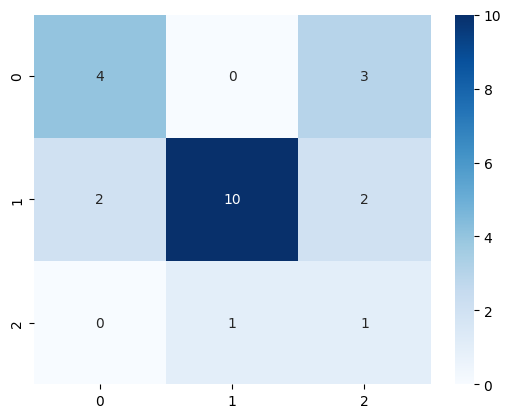

In [ ]:
trees = ExtraTreesClassifier()
model_function(trees)

Train Accuracy:  0.6821705426356589
Accuracy:  0.6521739130434783


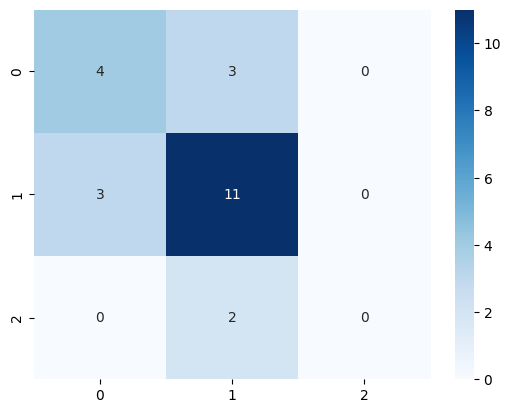

In [ ]:
#Neighbors
kneighbors = KNeighborsClassifier()
model_function(kneighbors)

Train Accuracy:  1.0
Accuracy:  0.6086956521739131


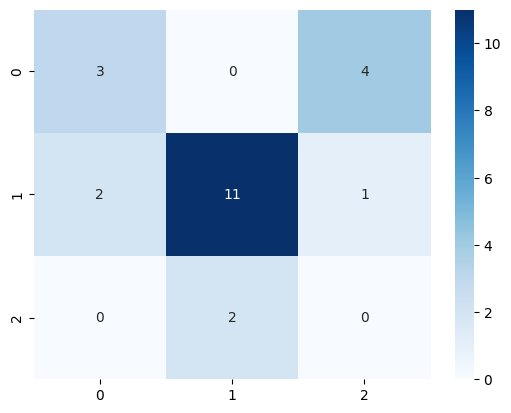

In [ ]:
#AdaBoostClassifier
tree = DecisionTreeClassifier()
boost = AdaBoostClassifier(tree, learning_rate=0.01, n_estimators=150)
model_function(boost)

In [ ]:
#Let's Try Predicting Our Match
#Run a model
input_data = [
11., 17.33333333,  4., 4.33333333, 13.,
11.,  5.,  5.66666667, 1.66666667,  1.,
0.,  0.
]

# Create a list of zeros for the one-hot encoded teams
one_hot_teams = [0.0] * 90

# Find the index for "HomeTeam_Real Madrid" and "AwayTeam_Marseille"
home_team_index = X.columns.get_loc("HomeTeam_Real Madrid") - 12 # Subtract 12 for the stats columns
away_team_index = X.columns.get_loc("AwayTeam_Marseille") - 12 # Subtract 12 for the stats columns

# Set the corresponding indices to 1.0
one_hot_teams[home_team_index] = 1.0
one_hot_teams[away_team_index] = 1.0

# Concatenate the stats and the one-hot encoded teams
input_data.extend(one_hot_teams)

input_np = np.asarray(input_data)
input_reshaped = input_np.reshape(1, -1)
prediction = kneighbors.predict(input_reshaped)

#print(prediction)
if (prediction[0] == 0):
    print("Away Team Wins")
elif (prediction[0] == 1):
    print("Home Team Wins")
else:
    print("Draw")

Home Team Wins
